## SALES CONVERSION OPTIMIZATION

### 1.Loading necessary libraries

Custer Analysis for ad conversion data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import plotly.express as px
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

### 2.Loading Dataset

In [5]:
import pandas as pd
df=pd.read_csv("C:\\Users\\DERLIN DOMINIC\\Downloads\\KAG_conversion_data.csv",encoding='unicode_escape')
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


This data is about a company's social media ad campaign.It contains different factors considered for social media campaigning.We have a total of 1143 rows and 11 columns. The dataset contains these columns such as:
- ad_id: This column has unique id for each ad
- xyz_campaign_id:an ID associated with each ad campaign of XYZ company
- fb_campaign_id: an ID associated with how Facebook tracks each campaign.
- age: age of the person to whom the ad is shown
- gender: gender of the person to whom the ad is shown
- interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).
-  Impressions: the number of times the ad was shown.
- Clicks: number of clicks on for that ad.
- Spent: Amount paid by company xyz to Facebook to show that ad.
- Total conversion: Total number of people who enquired about the product after seeing the ad.
- Approved conversion: Total number of people who bought the product after seeing the ad.




In [6]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


### 3. Statistical Description

In [7]:
df.shape

(1143, 11)

In [8]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


We can understand from this following table that average of 2.85 people who enquired about each ad and we have maximum 21 people who buys a product after enquiring and have a maximum 60 people who enquiring about the ad. The maximum clicks we receive in an ad is 421.

In [9]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

As we can see from the above there is 11 variables and we have integers,floats, objects in our data

In [10]:
list(df['Approved_Conversion'].unique())

[1, 0, 3, 2, 14, 5, 10, 17, 21, 4, 9, 7, 8, 12, 6, 13]

### 4. TESTING FOR MISSING VALUES

In [11]:
print(df.isnull().sum())

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64


Here we can see that there is no missing values in the data. So we are proceeding with our analysis

### 6. Data Visualisation

In [57]:
print(df['xyz_campaign_id'].unique())

[ 916  936 1178]


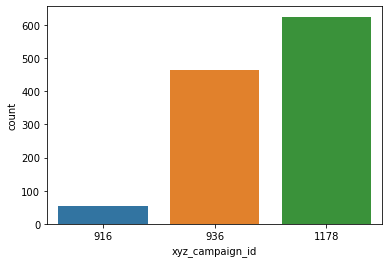

In [58]:
sns.countplot(x="xyz_campaign_id",data = df)
plt.show()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
ad_id,1.000000,0.929892,0.972002,0.456483,0.462308,0.431981,0.433053,0.346539,0.271331
xyz_campaign_id,0.929892,1.000000,0.872392,0.272282,0.495273,0.469729,0.476689,0.346684,0.284968
fb_campaign_id,0.972002,0.872392,1.000000,0.595753,0.439439,0.406978,0.403532,0.344170,0.257658
interest,0.456483,0.272282,0.595753,1.000000,0.101973,0.088706,0.070226,0.120270,0.058353
Impressions,0.462308,0.495273,0.439439,0.101973,1.000000,0.948514,0.970386,0.812838,0.684249
Clicks,0.431981,0.469729,0.406978,0.088706,0.948514,1.000000,0.992906,0.694632,0.559526
Spent,0.433053,0.476689,0.403532,0.070226,0.970386,0.992906,1.000000,0.725379,0.593178
Total_Conversion,0.346539,0.346684,0.344170,0.120270,0.812838,0.694632,0.725379,1.000000,0.864034
Approved_Conversion,0.271331,0.284968,0.257658,0.058353,0.684249,0.559526,0.593178,0.864034,1.000000


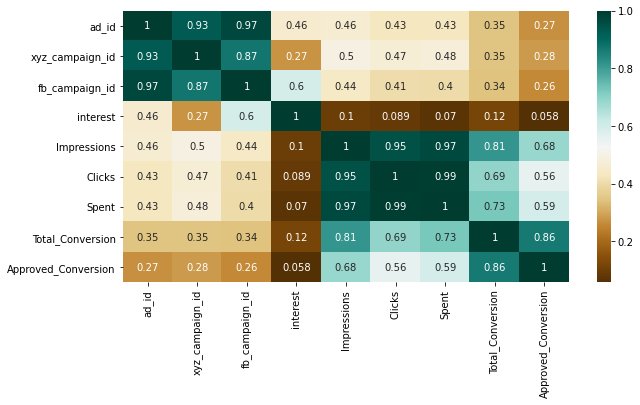

In [59]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Here it's clear, "Impressions" and "Total_Conversion" are more correlated with "Approved_Conversion" , "Clicks" and "Spent".

<AxesSubplot:xlabel='Approved_Conversion', ylabel='count'>

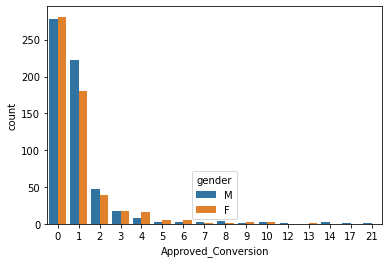

In [60]:
sns.countplot(x='Approved_Conversion',hue='gender',data=df)

it is quite evident that more men have bought the product after seeing the ad so a man buying the product after ad is more probable than a woman

<AxesSubplot:xlabel='Total_Conversion', ylabel='count'>

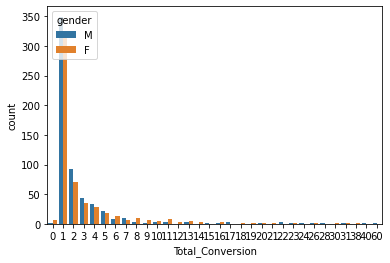

In [61]:
sns.countplot(x='Total_Conversion',hue='gender',data=df)

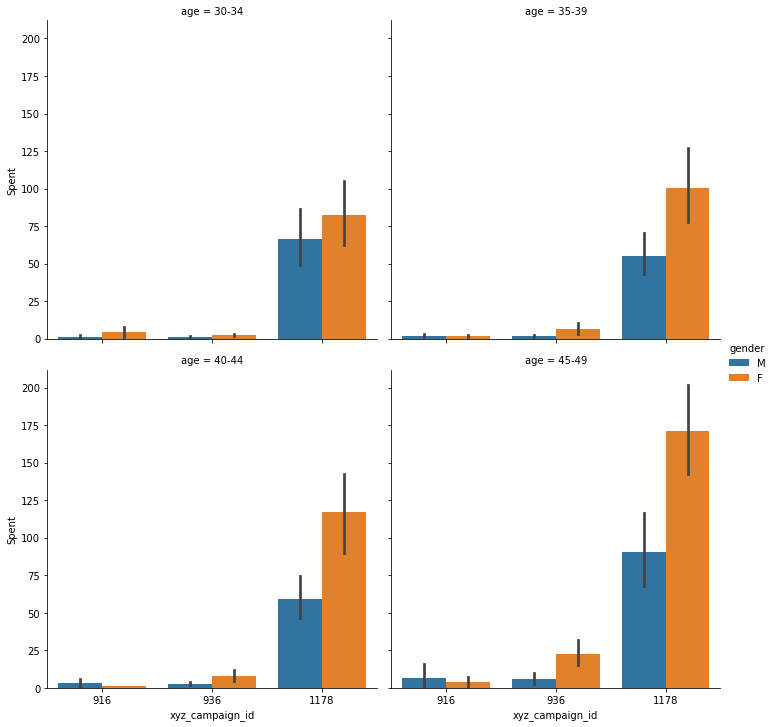

In [62]:
sns.catplot(x="xyz_campaign_id", y="Spent",hue="gender", col="age",kind="bar",data=df,col_wrap=2)

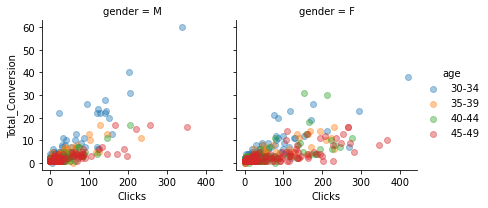

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, col="gender", hue="age")
g.map(plt.scatter, "Clicks", "Total_Conversion", alpha=.4)
g.add_legend();

From this graph we can conclude that:
- More clicks have been done by women
- But in the age group 30-34 men have enquired more than women after seeing ann ad
- The age group of 45-49 showed highest activity of clicking on ads


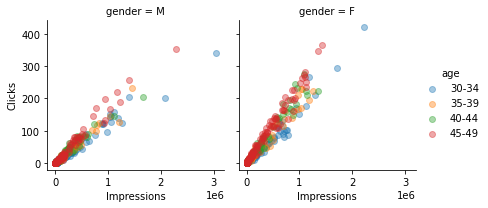

In [64]:
g = sns.FacetGrid(df, col="gender", hue="age")
g.map(plt.scatter, "Impressions", "Clicks", alpha=.4)
g.add_legend();

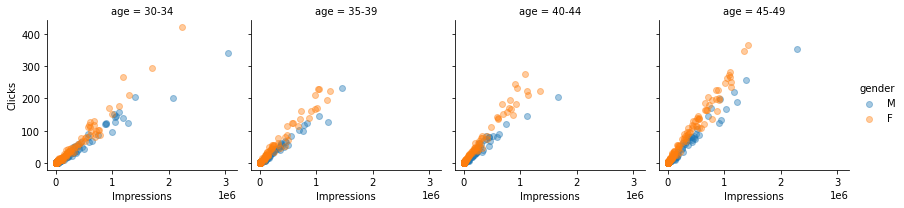

In [65]:
g = sns.FacetGrid(df, col="age", hue="gender")
g.map(plt.scatter, "Impressions", "Clicks", alpha=.4)
g.add_legend();

From this graph we can see that:
- women clicks more on the ad than men
- age group 45-49 have highest no in clicking the ads

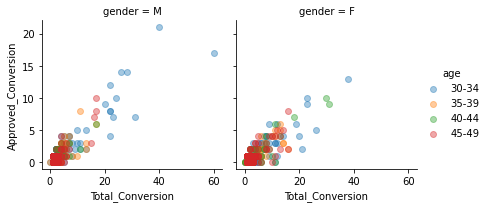

In [66]:
g = sns.FacetGrid(df, col="gender", hue="age")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend();

DOUBT:
From this graph we can understand about people who bought the product after enquiring about it:
- Men tends to enquire more about the product than women
- More Men tends to buy product after enquiring than women

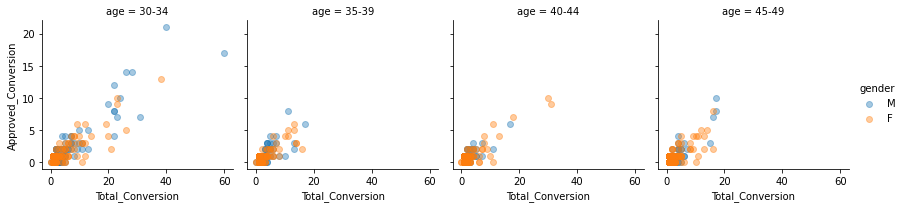

In [67]:
g = sns.FacetGrid(df, col="age", hue="gender")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend();


This graph clearly depicts that men and women in the age group of 30-34 have bought the product after equiring about it.The age group of 30-34 enquired about the product and bought the product more as compared to the rest of the age groups

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Impressions'>

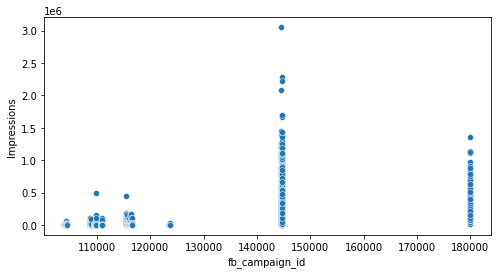

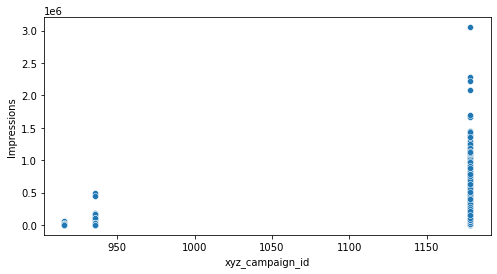

In [68]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'fb_campaign_id' ,y='Impressions', data=df)
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'xyz_campaign_id' ,y='Impressions', data=df)

The ads by xyz companies were displayed relatively fewer times than facebook ads. Hence fewer clicks than facebook ads

### 5. Identifying Outliers

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ad_id                  344172.000
xyz_campaign_id           242.000
fb_campaign_id          28941.500
interest                   15.000
Impressions            215265.500
Clicks                     36.500
Spent                      58.545
Total_Conversion            2.000
Approved_Conversion         1.000
dtype: float64


In [12]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

      Approved_Conversion  Clicks  Impressions  Spent  Total_Conversion  \
0                   False   False        False  False             False   
1                   False   False        False  False             False   
2                   False   False        False  False             False   
3                   False   False        False  False             False   
4                   False   False        False  False             False   
...                   ...     ...          ...    ...               ...   
1138                False   False        False  False             False   
1139                False   False        False  False             False   
1140                False   False        False  False             False   
1141                False   False        False  False             False   
1142                False   False        False  False             False   

      ad_id    age  fb_campaign_id  gender  interest  xyz_campaign_id  
0     False  False         

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

<AxesSubplot:xlabel='Clicks'>

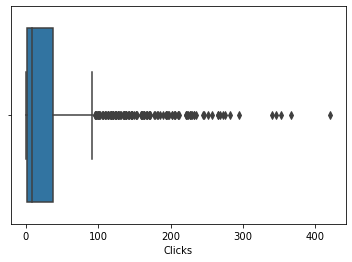

In [53]:
sns.boxplot(x=df['Clicks'])

<AxesSubplot:xlabel='Spent'>

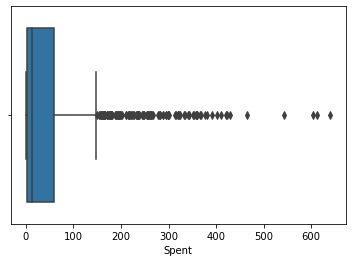

In [54]:
sns.boxplot(x=df['Spent'])

<AxesSubplot:xlabel='Total_Conversion'>

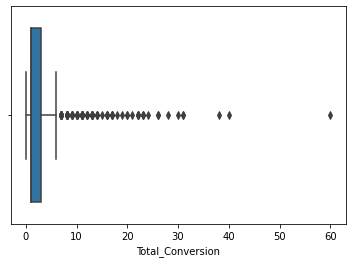

In [55]:
sns.boxplot(x=df['Total_Conversion'])

<AxesSubplot:xlabel='Approved_Conversion'>

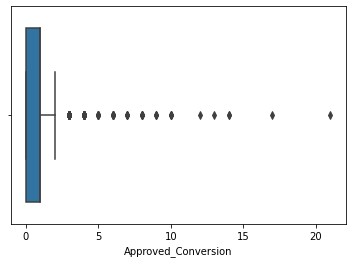

In [56]:
sns.boxplot(x=df['Approved_Conversion'])

### 7.Linear Rregression Model Building

In [12]:
df= df.replace('30-34',0.0011)
df = df.replace('35-39',0.0012)
df = df.replace('40-44',0.0013)
df = df.replace('45-49',0.0014)
df = df.replace('M',1)
df = df.replace('F',0)
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,0.0011,1,15,7350,1,1.430000,2,1
1,708749,916,103917,0.0011,1,16,17861,2,1.820000,2,0
2,708771,916,103920,0.0011,1,20,693,0,0.000000,1,0
3,708815,916,103928,0.0011,1,28,4259,1,1.250000,1,0
4,708818,916,103928,0.0011,1,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,0.0014,0,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,0.0014,0,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,0.0014,0,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,0.0014,0,113,790253,135,198.710000,8,2


### Splitting of data

In [13]:
X = df[[ 'interest', 'Impressions', 'Clicks', 'Spent',
       'Total_Conversion','age','gender']]
y = df['Approved_Conversion']
X.shape

(1143, 7)

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)# We splitted the data into 80 20 ratio

In [42]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

### Predicting

In [122]:
from sklearn.tree import DecisionTreeRegressor # decision tree regressor
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
tree.score(X_test,y_test)

0.5215287307227436

In [43]:
import sklearn 
from sklearn import linear_model
model_ols = LinearRegression().fit(X_train, y_train)
get_cv_scores(model_ols)

CV Mean:  0.604023272686588
STD:  0.16793709009096683




In [44]:
model_ols.fit(X_train, y_train)

LinearRegression()

In [45]:
#testing the accuracy
accuracy = model_ols.score(X_test, y_test)
print("Accuracy:",(int(round(accuracy*100))))

Accuracy: 79


In [46]:
y_pred = model_ols.predict(X_test)

In [47]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data.head()

,Actual,Predicted
710,0,0.415758
1060,2,0.994802
986,1,0.254178
624,1,1.424172
270,1,0.435579


In [32]:
y_pred = model_ols.predict(X_test)

In [33]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
710,0,0.415758
1060,2,0.994802
986,1,0.254178
624,1,1.424172
270,1,0.435579


### Evaluation

In [34]:
import statistics
SSE = sum((y_pred -  y_test)**2)
SST = sum((statistics.mean(y_pred)-y_test)**2)
R2=1-SSE/SST
R2

0.7896461629364697

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6380056566051373
Mean Squared Error: 0.8823418719163757
Root Mean Squared Error: 0.9393305445456225


### Interpretation
- This model provides equation for predicting approved sales conversion which can be predicted by clicks, amount spend,impressions,age gender, total conversions
- it has predicted 79% of values correctly as it got a 79% accuracy. We have R square as 0.7896 which is not bad but 78% of approved conversions can be predicted by the variations in the spend,impressions,clicks,total conversions,age,gender.

### CONCLUSION

This data is about a company's social media ad campaign.It contains different factors for approved conversions i.e,Total number of people who bought the product after seeing the ad.We have a total of 1143 rows and 11 columns.We conducted basic statistical description on the dataset. From running the test for missing value we find out that the dataset has no missing values. For better understanding of data we conducted some data visualization and we found out the columns which wil affect our target variable. Features such as age,gender,spend,click,impression,total conversions had a strong correlation with the target variable. We build linear regression model and got an accuracy of 79%. we predicted the model,evaluated and interpreted.